In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

poster = True
figscale = 1.75 if poster else 1.0

sns.set_theme(
    context="poster" if poster else "paper",
    style="whitegrid",
    rc={
        "figure.figsize": (figscale * 3.5, figscale * 3.5),
        "figure.dpi": 150,
        "savefig.dpi": 1000,
        # "figure.constrained_layout.use": True,
        "pdf.fonttype": 42,
    },
)

In [34]:
df_cnn = pd.read_csv("../data/out/generalization/e7ivqipk.csv")
df_cnn["filter"] = "cnn"
df_lmb = pd.read_csv("../data/out/lmb_summary.csv")
df_glmb = pd.read_csv("../data/out/glmb_summary.csv")
df_combined = pd.concat([df_cnn, df_lmb, df_glmb]).reset_index(drop=True)

In [35]:
(
    df_combined.groupby(["scale", "filter"])["ospa"]
    .agg(["mean", "std"])
    .style.format("{:.0f}")
)

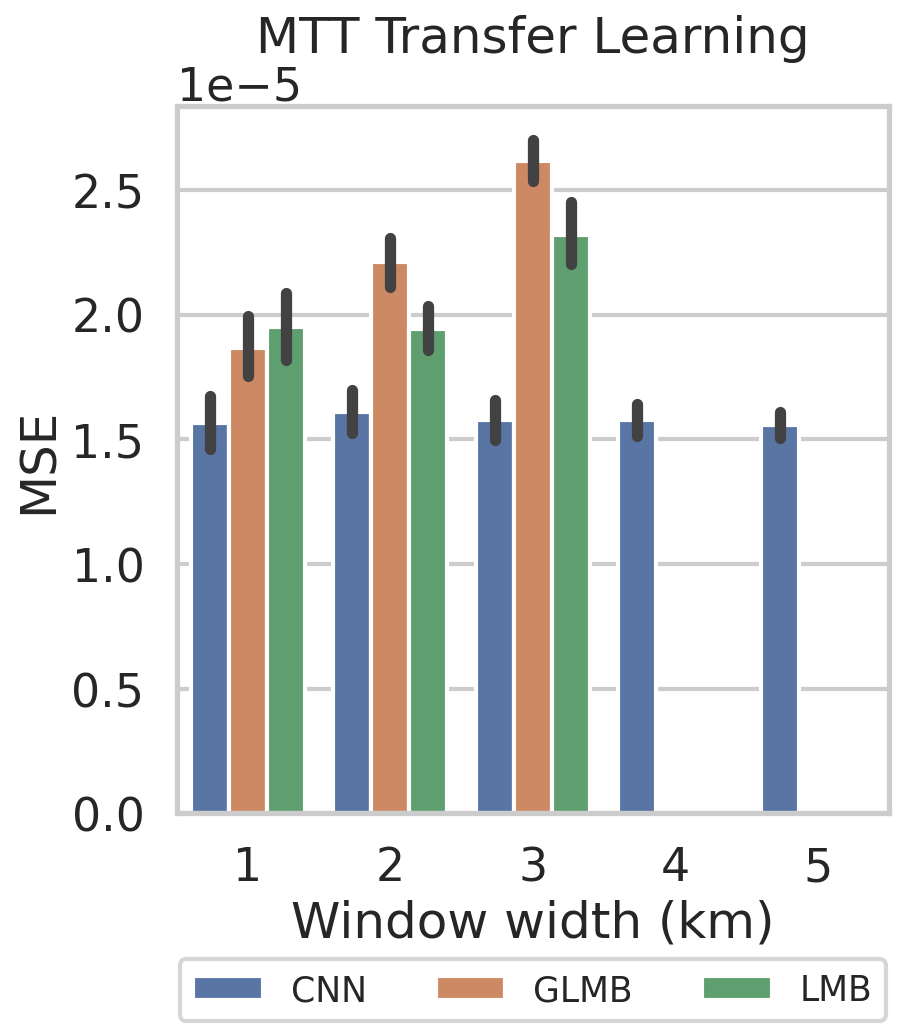

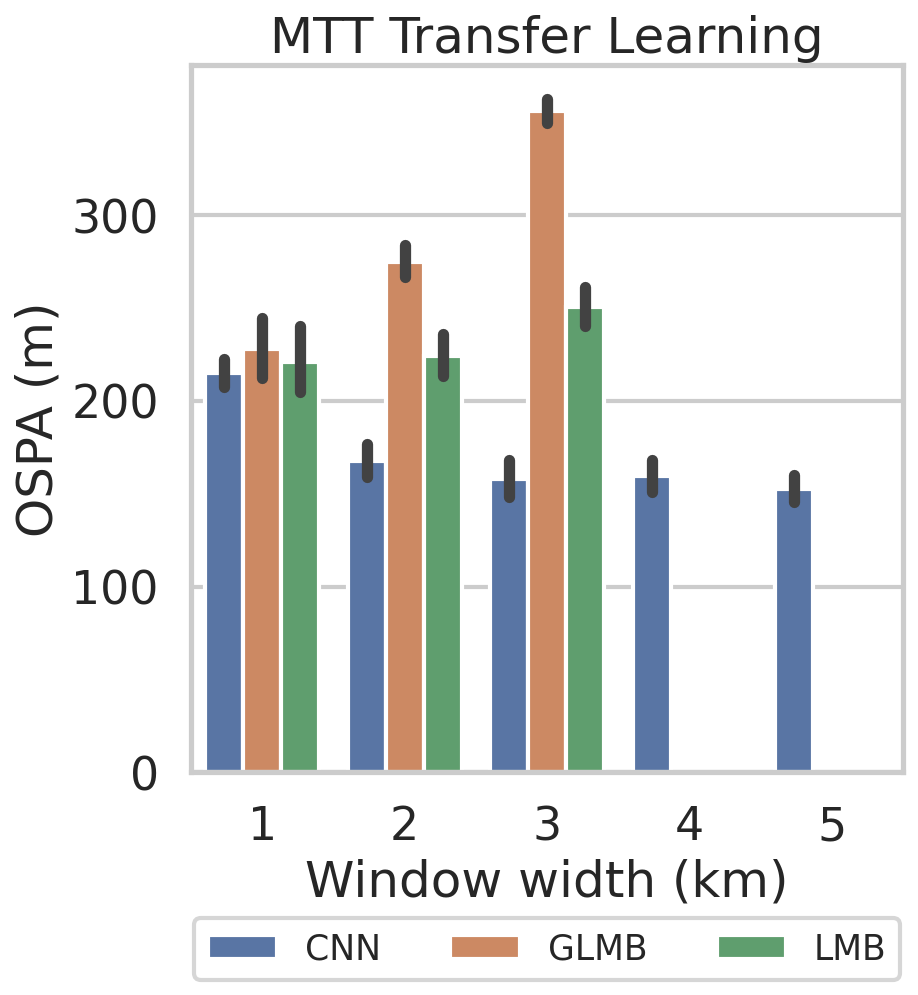

In [36]:
data = (
    df_combined.groupby(["filter", "scale", "simulation_idx"], as_index=False)
    .mean()
    .replace({"cnn": "CNN", "lmb": "LMB", "glmb": "GLMB"})
)

plt.figure()
sns.barplot(data=data, x="scale", y="mse", hue="filter", errorbar="ci")
plt.legend(
    loc="center",
    bbox_to_anchor=(1.1, -0.3, -1.2, 0.1),
    ncols=3,
    title=None,
    fontsize="x-small" if poster else None,
)
plt.ylabel("MSE" if poster else "Mean Squared Error")
plt.xlabel("Window width (km)")
if poster:
    plt.title("MTT Transfer Learning")
plt.savefig("../figures/mtt_mse.pdf", bbox_inches="tight")
plt.savefig("../figures/mtt_mse.png", bbox_inches="tight")
plt.show()

plt.figure()
sns.barplot(data=data, x="scale", y="ospa", hue="filter", errorbar="ci")
plt.legend(
    loc="center",
    bbox_to_anchor=(1.1, -0.3, -1.2, 0.1),
    ncols=3,
    title=None,
    fontsize="x-small" if poster else None,
)
plt.ylabel("OSPA (m)" if poster else "Optimal Sub-pattern Assignment")
plt.xlabel("Window width (km)")
if poster:
    plt.title("MTT Transfer Learning")
plt.savefig("../figures/mtt_ospa.pdf", bbox_inches="tight")
plt.savefig("../figures/mtt_ospa.png", bbox_inches="tight")
plt.show()

# plt.figure()
# sns.barplot(data=data.query("filter != 'CNN'"), x="scale", y="ospa1", hue="filter", errorbar="ci")
# plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
# plt.ylabel("Optimal Sub-pattern Assignment (p=1)")
# plt.xlabel("Window width (km)")
# plt.savefig("../figures/ospa1.pdf")
# plt.savefig("../figures/ospa1.png")
# plt.show()

# CNN Runtime

In [60]:
from scipy.stats import zscore

df = pd.read_csv("../data/out/generalization/e7ivqipk_runtime.csv")
# filter out columns with zscore greater than 3
df = df[df.groupby("scale").forward.transform(zscore).abs() < 3]
df.groupby("scale").agg(["mean", "std"]).apply(lambda x: (x * 1000).round(2))

data      forward          peaks            load     
      mean  std    mean   std     mean     std    mean  std
scale                                                      
1      0.0  0.0    1.35  0.08    29.20    5.44   83.78  0.0
2      0.0  0.0    2.08  0.06    66.62    8.27  127.80  0.0
3      0.0  0.0    4.80  0.05   189.58   28.63  208.45  0.0
4      0.0  0.0    6.62  0.04   448.14   46.72  310.21  0.0
5      0.0  0.0   10.48  0.05  1045.65  106.74  500.75  0.0